In [334]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd, numpy as np, networkx as nx

# Creamos las Clases con sus métodos:

In [335]:

class Nodo:
    Nombre = ""

    def __init__(self, nombre):
        self.Nombre = nombre

    def __str__(self):
        return self.Nombre
    def __eq__(self, value):
        return self.Nombre == value

class Arista:
    Origen = ""
    Destino = ""
    Tiempo = 0

    def __init__(self, origen, destino, tiempo):
        self.Origen = origen
        self.Destino = destino
        self.Tiempo = tiempo

    def __str__(self):
        return f"{self.Origen} ==[{self.Tiempo}]=> {self.Destino}"

class Grafo:
    _Nodos_ = list()
    _Aristas_ = list()

    def __init__(self):
        pass

    def cargar_desde_csv(self, csv):
        with open(csv, "r") as file:
            rutas = file.read().split("\n")[1:-1]

            for ruta in rutas:
                aux = ruta.split(",")
                origen = aux[0]
                destino = aux[1]
                tiempo = aux[2]

                nodo = Nodo(origen)
                arista = Arista(origen, destino, tiempo)

                if (not self._Nodos_.__contains__(nodo)):
                    self._Nodos_.append(nodo)
                if (not self._Aristas_.__contains__(arista)):
                    self._Aristas_.append(arista)

    def A_Estrella(self, start, end):
        G = nx.Graph()

        # Iteramos por cada valor y construimos las conexiones
        for arista in self._Aristas_:
            G.add_node(arista.Origen)
            G.add_edge(arista.Origen, arista.Destino, weight = float(arista.Tiempo))

        # Calcular posiciones para heurística
        pos = nx.spring_layout(G)

        # Camino con A*
        pathStar = nx.astar_path(G, start, end, weight='weight', heuristic=lambda a, b: np.linalg.norm(np.array(pos[a]) - np.array(pos[b])))

        # Dibujar el grafo con los caminos
        pos = nx.spring_layout(G)
        plt.figure(figsize=(8, 6))
        
        # Dibujar nodos y etiquetas
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=10)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        
        # Dibujar camino de A*
        if pathStar:
            edgesStar = [(pathStar[i], pathStar[i + 1]) for i in range(len(pathStar) - 1) if G.has_edge(pathStar[i], pathStar[i + 1])]
            nx.draw_networkx_edges(G, pos, edgelist=edgesStar, edge_color='red', width=2, style='solid', label='A*')

        plt.legend()
        plt.show()

    def Dijkstra(self, start, end):
        G = nx.Graph()

        # Iteramos por cada valor y construimos las conexiones
        for arista in self._Aristas_:
            G.add_node(arista.Origen)
            G.add_edge(arista.Origen, arista.Destino, weight = float(arista.Tiempo))

        # Calcular posiciones para heurística
        pos = nx.spring_layout(G)

        # Camino con Dijkstra
        pathDijkstra = nx.dijkstra_path(G, start, end, weight='weight')

        # Dibujar el grafo con los caminos
        pos = nx.spring_layout(G)
        plt.figure(figsize=(8, 6))
        
        # Dibujar nodos y etiquetas
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=10)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        
        # Dibujar camino de Dijkstra
        if pathDijkstra:
            edgesDijkstra = [(pathDijkstra[i], pathDijkstra[i + 1]) for i in range(len(pathDijkstra) - 1) if G.has_edge(pathDijkstra[i], pathDijkstra[i + 1])]
            nx.draw_networkx_edges(G, pos, edgelist=edgesDijkstra, edge_color='blue', width=2, label='Dijsktra')

        plt.legend()
        plt.show()


# Caminos del Grafo:

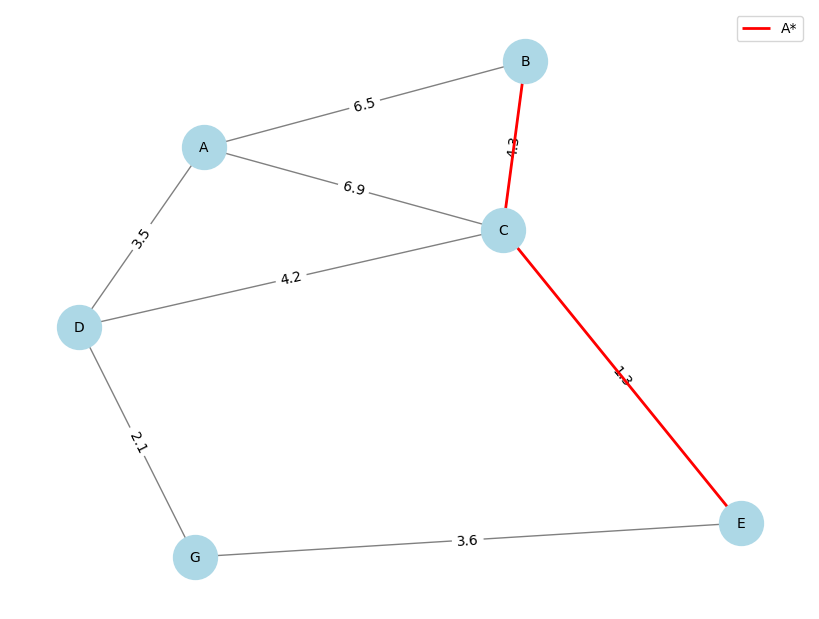

In [336]:
grafo = Grafo()

# Cargamos los datos con una función
grafo.cargar_desde_csv("Examen.csv")

# Calculamos y pintamos A*
grafo.A_Estrella("E", "B")

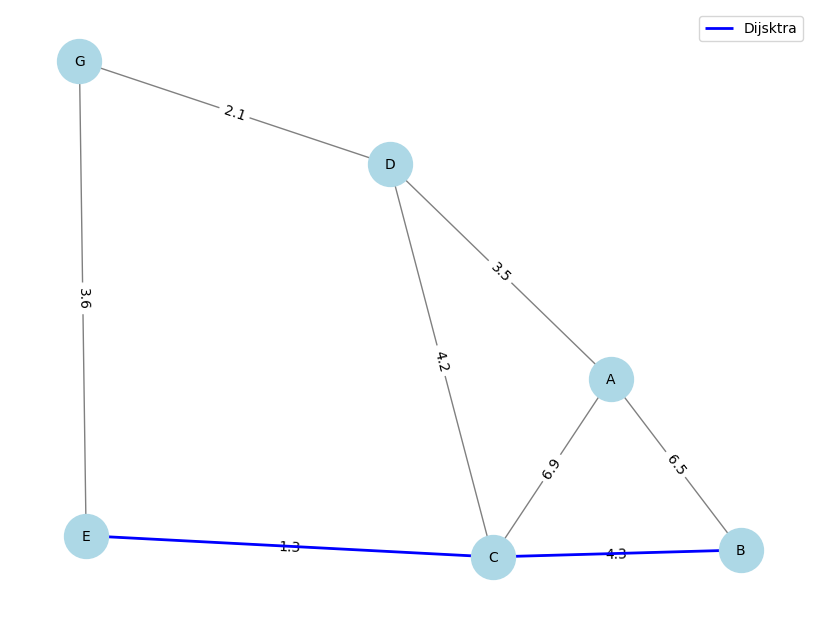

In [337]:
# Calculamos y pintamos Dijkstra
grafo.Dijkstra("E", "B")

# Uso de Networkx:

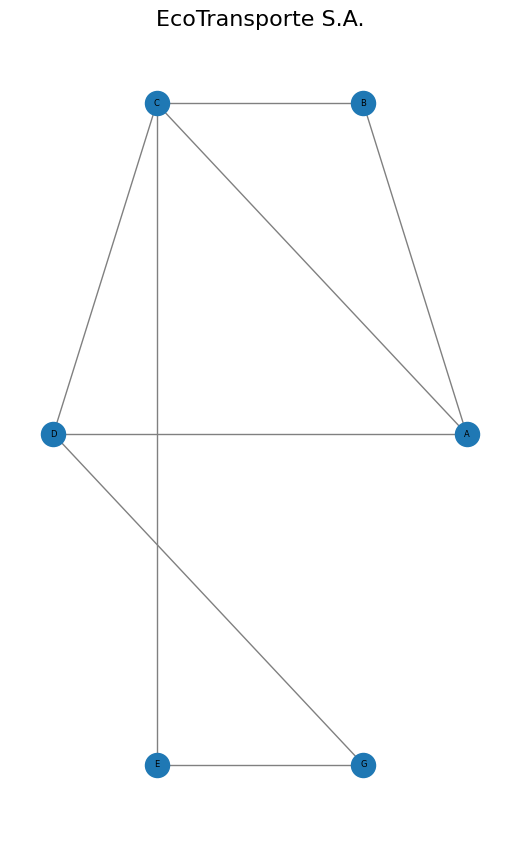

In [338]:
#Leemos el archivo como un DataFrame:
rutas = pd.read_csv("Examen.csv")

def GenerateGraph(df_generated):
    # Crear el grafo
    G = nx.Graph()

    for _, row in df_generated.iterrows():
        origen = row['Origen']
        destino = row['Destino']
        tiempo = row['TiempoEstimado']

        G.add_node(origen)
        G.add_edge(origen, destino, weight=tiempo)

    # Dibujar el grafo
    plt.figure(figsize=(5, 8))
    pos = nx.circular_layout(G)  # Algoritmo para distribuir nodos

    nx.draw(
        G, pos, with_labels=True, node_size=300, font_size=6, font_color="black", edge_color="gray"
    )

    plt.title("EcoTransporte S.A.", fontsize=16)
    plt.show()
GenerateGraph(rutas)

## ¿Qué ocurre con la solución de Dijkstra y la de A* al utilizar como heurística el tiempo?.¿Podrías mejorarlo?Si es así, presenta tu solución en Networkx y contrástala.
<p>

<p>